In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import itertools


## Task - 1 :- Image Segmentation Using Thresholding

In [45]:
image_1_path = r'/kaggle/input/dip-assignment-4/question_1.jpg'

In [46]:
temp_image =cv2.imread( image_1_path)

In [47]:
image = cv2.imread( image_1_path , cv2.IMREAD_GRAYSCALE)

In [48]:
print(f'image shape :-  {image.shape}')

image shape :-  (865, 1280)


In [49]:
_, binary_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


In [50]:
threshold_methods = {
    'Original Image': temp_image,
    'Binary Thresholding': binary_thresh,
    'Adaptive Thresholding': adaptive_thresh,
    "Otsu's Thresholding": otsu_thresh
}

In [51]:
plt.figure(figsize=(12, 8))

for i, (title, img) in enumerate(threshold_methods.items()):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()


### Observation :-

- Among the three thresholding methods, adaptive thresholding proves to be the most effective, providing the clearest edges and the highest accuracy. Otsu's method comes next, but it lacks the level of detail achieved by adaptive thresholding. Simple thresholding ranks the lowest, delivering the least distinct edges and the poorest accuracy.

## Task - 2 :-  Line Detection Using Hough Transform

In [52]:
image_2_path = r'/kaggle/input/dip-assignment-4/question_2.jpeg'

In [53]:
image = cv2.imread(image_2_path, cv2.IMREAD_COLOR)

In [54]:
print(f'The image shape :- {image.shape}')

The image shape :- (275, 183, 3)


In [55]:
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

In [56]:
def detect_and_highlight_lines(image, rho=1, theta=np.pi / 180, threshold=80):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) > 2 else image

    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, rho, theta, threshold)

    result_image = image.copy()

    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a, b = np.cos(theta), np.sin(theta)
            x0, y0 = a * rho, b * rho
            x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * (a))
            x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * (a))
            cv2.line(result_image, (x1, y1), (x2, y2), (0, 0, 255), 1)

    return result_image, edges

In [57]:
result_image, edges = detect_and_highlight_lines(binary_image)

In [58]:
titles = ['Canny Edges', 'Detected Lines']
images = [edges, cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)]

In [59]:
plt.figure(figsize=(12, 6))

for i, (title, img) in enumerate(zip(titles, images)):
    plt.subplot(1, 2, i + 1)

    plt.imshow(img if i else img, cmap='gray' if i == 0 else None)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [61]:
rho_values = [1, 2, 3]
theta_values = np.pi / 180 * np.array([45, 90, 135])
threshold_values = [50, 100, 150]


In [62]:
parameter_combinations = list(itertools.product(range(3), range(3)))

In [63]:
plt.figure(figsize=(12, 12))

for idx, (i, j) in enumerate(parameter_combinations):
    
    rho, theta, threshold = rho_values[i], theta_values[j], threshold_values[i]
    result_image, _ = detect_and_highlight_lines(image, rho, theta, threshold)
    
    plt.subplot(3, 3, idx + 1)
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title(f"rho = {rho}, theta = {theta:.2f}, threshold = {threshold}")
    plt.axis('off')

plt.tight_layout()
plt.show()


### Observation :-
- The parameters of the HoughLines function are rho, theta, and threshold. The rho parameter is the distance resolution of the accumulator in pixels. The theta parameter is the angle resolution of the accumulator in radians. The threshold parameter is the minimum number of intersections to detect a line. Increasing the threshold value will result in fewer lines being detected, while increasing the rho and theta values will result in more lines being detected, as seen in the results of the code.

## Task - 3 :- Circle Detection Using Hough Circle Transform

In [65]:
image_3_path = r'/kaggle/input/dip-assignment-4/question_3.jpg'

In [66]:
image = cv2.imread(image_3_path, cv2.IMREAD_COLOR)

In [67]:
print(f'image shape :- {image.shape}')

image shape :- (576, 1024, 3)


In [68]:
def detect_circles(image, minDist=30, cannyThresh=50, accThresh=30, minRadius=0, maxRadius=100):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) > 2 else image

    blurred = cv2.GaussianBlur(gray, (9, 9), 2)

    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=minDist,
        param1=cannyThresh,
        param2=accThresh,
        minRadius=minRadius,
        maxRadius=maxRadius
    )

    result_image = image.copy()

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            center = (circle[0], circle[1])  # Circle center
            radius = circle[2]  # Circle radius
            # Draw the circle outline
            cv2.circle(result_image, center, radius, (0, 255, 0), 2)
            # Draw the circle center
            cv2.circle(result_image, center, 2, (255, 0, 0), 3)

    return result_image

In [69]:
result_image = detect_circles(image)

In [70]:
titles = ['Original Image', 'Detected Circles']
images = [image, result_image]

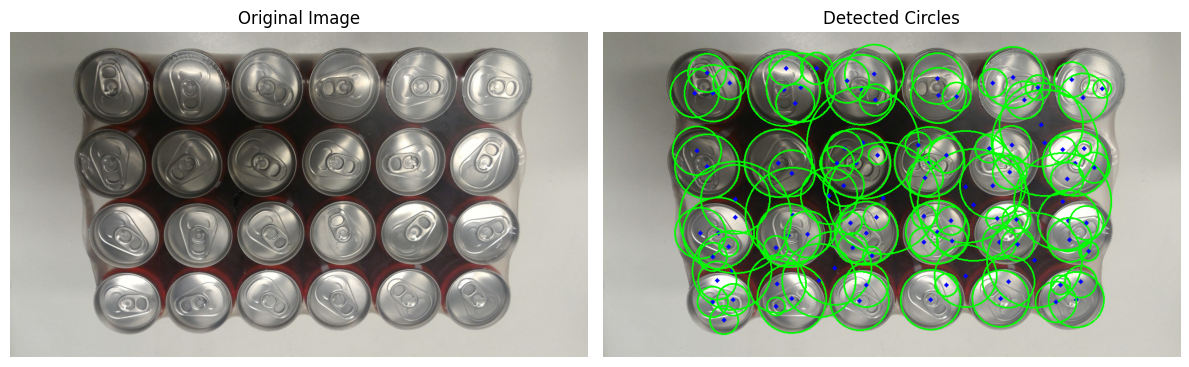

In [71]:
plt.figure(figsize=(12, 6))

for i, (title, img) in enumerate(zip(titles, images)):
    plt.subplot(1, 2, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [117]:
result_image = detect_circles(image, minDist=15, cannyThresh=170, accThresh=45)

In [118]:
titles = ['Original Image', 'Improved Circle Detection']
images = [image, result_image]

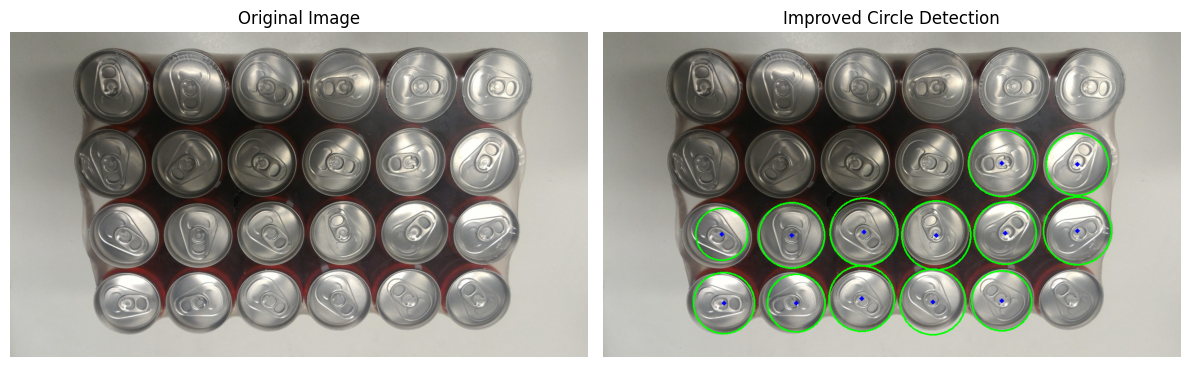

In [119]:
plt.figure(figsize=(12, 6))

for i, (title, img) in enumerate(zip(titles, images)):
    plt.subplot(1, 2, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()


#### Observation :-
- The circles are detected very well using the new parameters due to the increased canny threshold and decreased accumulator threshold. The increased canny threshold helps in detecting the edges of the circles more accurately, while the decreased accumulator threshold helps in detecting the circles more accurately by reducing the number of false positives.

## Task - 4 :- Harris Corner Detection

In [105]:
image_4_path = r'/kaggle/input/dip-assignment-4/question_4.jpg'

In [106]:
img4 = cv2.imread(image_4_path, cv2.IMREAD_COLOR)

In [107]:
print(f'The Image Shape :- {img4.shape}')

The Image Shape :- (353, 454, 3)


In [108]:
def harris_corner_detection(image, k=0.04, block_size=2, aperture_size=3, threshold=0.01):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) > 2 else image

    gray = np.float32(gray)

    dst = cv2.cornerHarris(gray, block_size, aperture_size, k)

    dst = cv2.dilate(dst, None)

    img_with_corners = image.copy()
    img_with_corners[dst > threshold * dst.max()] = [0, 0, 255] 

    return img_with_corners

In [109]:
corners_image = harris_corner_detection(img4)

In [110]:
titles = ["Original Image", "Corners Detected (Harris)"]
images = [img4, corners_image]


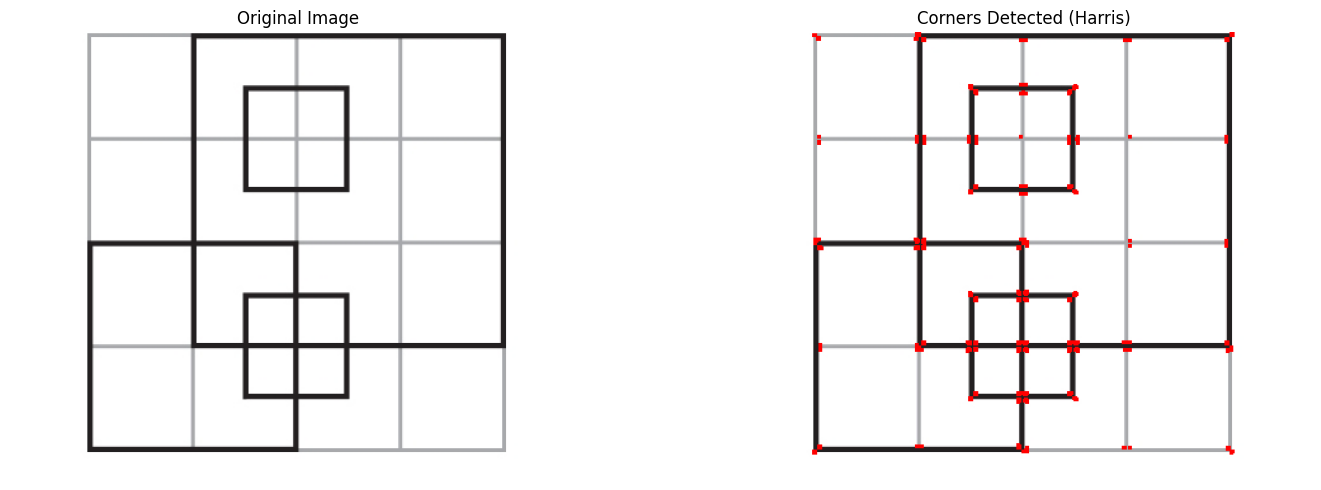

In [111]:
plt.figure(figsize=(15, 5))

for i, (title, img) in enumerate(zip(titles, images)):
    plt.subplot(1, 2, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [112]:
k_values = [0.0005, 0.04, 0.2, 0.5]

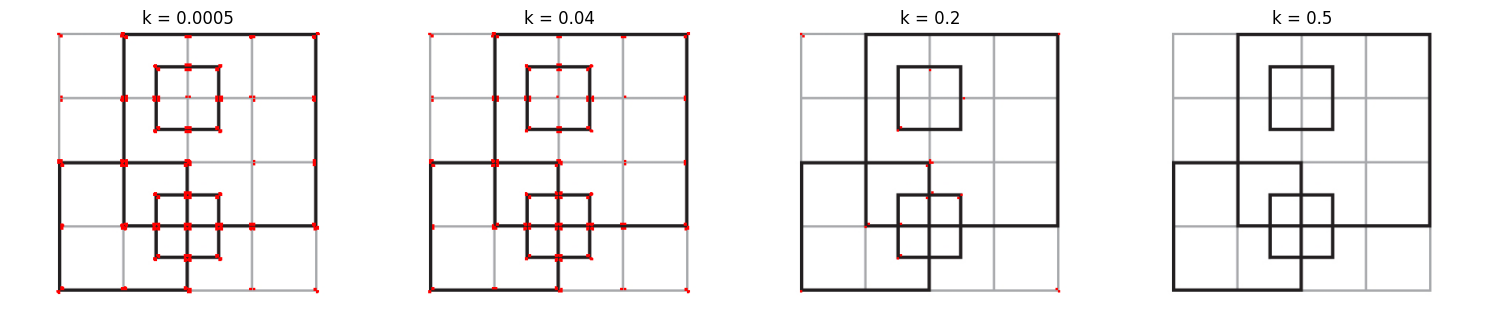

In [113]:
plt.figure(figsize=(15, 5))

for idx, k in enumerate(k_values, start=1):
    
    corners_image = harris_corner_detection(img4, k=k, block_size=2, aperture_size=3, threshold=0.01)
    
    plt.subplot(1, len(k_values), idx)
    plt.title(f"k = {k}")
    plt.imshow(cv2.cvtColor(corners_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")

plt.tight_layout()
plt.show()


#### Observation:-
- The k parameter in Harris Corner Detection controls the balance between corner strength and edge strength. Smaller k values prioritize corner strength, leading to more corner detections, including false positives. Larger k values prioritize edge strength, resulting in fewer but more robust corner detections. The optimal k value depends on image characteristics and desired corner density.

### Task- 5 - Hough Transform:-

- The Hough Transform (HT) is a widely used image processing technique for detecting geometric shapes. However, its implementation and computational demands vary significantly between line and circle detection due to differences in their parameter spaces.

- For lines, the HT maps image points to a 2D parameter space defined by 𝜌 and 𝜃, where  𝜌 represents the perpendicular distance from the origin and 𝜃 denotes the angle of the normal to the line. Each point in the image generates a sinusoidal curve in this parameter space, and the intersections of these curves correspond to potential lines. The computational efficiency of line detection arises from the relatively low-dimensional (2D) parameter space.

- In contrast, detecting circles requires a higher-dimensional parameter space. A circle is characterized by its center coordinates (𝑥𝑐 ,𝑦𝑐)  and radius 𝑟, necessitating a 3D parameter space. Each point in the image contributes to a 3D voting process across possible circle centers and radii. This significantly increases computational complexity compared to line detection due to the additional parameter and dimensionality.

- As a result, circle detection using the Hough Transform is inherently more computationally intensive than line detection.